# Diabetes Prediction Project: Data Exploration and Preprocessing

## 1. Introduction to the Dataset

The Pima Indians Diabetes Database is a collection of medical diagnostic measurements used to predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. All patients in this dataset are females at least 21 years old of Pima Indian heritage.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. You can find the dataset and more information about it on Kaggle:
[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

The dataset consists of several medical predictor variables and one target variable, `Outcome`.
The independent variables include:
* `Pregnancies`: Number of times pregnant
* `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* `BloodPressure`: Diastolic blood pressure (mm Hg)
* `SkinThickness`: Triceps skin fold thickness (mm)
* `Insulin`: 2-Hour serum insulin (mu U/ml)
* `BMI`: Body mass index (weight in kg/(height in m)^2)
* `DiabetesPedigreeFunction`: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* `Age`: Age in years
* `Outcome`: Class variable (0 if non-diabetic, 1 if diabetic)

## 2. Load and Inspect the Dataset

First, we'll load the dataset and perform an initial inspection to understand its structure, data types, and basic statistics.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'diabetes.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Successfully loaded {len(df)} records from {file_path}")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")
    # Exit or handle the error appropriately
except Exception as e:
    print(f"Error loading file: {e}")
    # Exit or handle the error appropriately

# Display the first few rows of the dataset
print("\n--- First 5 rows of the dataset ---")
print(df.head())

# Display basic information about the dataset (data types, non-null counts)
print("\n--- Dataset Info ---")
df.info()

# Display descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())

Successfully loaded 768 records from diabetes.csv

--- First 5 rows of the dataset ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    ----

### Observations from Initial Inspection:
* The dataset contains 768 entries and 9 columns.
* All columns are of numeric type (`int64` or `float64`).
* The `Outcome` column is the target variable.
* From `df.describe()`, we can see that some columns like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` have a minimum value of 0, which is biologically implausible for these measurements. This suggests that '0' values in these columns actually represent missing data.

## 3. Clean Missing or Incorrect Data

As observed, '0' values in certain columns are not valid measurements and should be treated as missing data (NaN). We will replace these '0's with `np.nan` and then impute them using the median strategy.

In [8]:
from sklearn.impute import SimpleImputer

# Define features and target
features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]
target = 'Outcome'

X = df[features]
y = df[target]

# Replace '0' values with NaN in specific columns where 0 is not a valid measurement
# For Glucose, BloodPressure, SkinThickness, Insulin, BMI, 0 indicates missing data
cols_to_impute_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
X[cols_to_impute_zeros] = X[cols_to_impute_zeros].replace(0, np.nan)

print("\n--- Count of NaN values after replacing 0s ---")
print(X.isnull().sum())

# Impute missing values (NaNs) using the median strategy
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=features) # Convert back to DataFrame

print("\n--- Descriptive Statistics after Imputation ---")
print(X_imputed_df.describe())

print("\n--- Count of NaN values after Imputation ---")
print(X_imputed_df.isnull().sum())


--- Count of NaN values after replacing 0s ---
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

--- Descriptive Statistics after Imputation ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.00

C:\Users\shkob\AppData\Local\Temp\ipykernel_24768\1839256483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_to_impute_zeros] = X[cols_to_impute_zeros].replace(0, np.nan)


### Observations after Cleaning:
* The '0' values in `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` have been successfully replaced with `NaN`.
* The `SimpleImputer` using the median strategy has filled these `NaN` values, as confirmed by the `isnull().sum()` output showing no missing values. The descriptive statistics now reflect more realistic minimum values for the imputed columns.

## 4. Normalize or Transform Values (Feature Scaling)

To ensure that no single feature dominates the model due to its scale, we will apply StandardScaler. This technique scales features to have a mean of 0 and a standard deviation of 1.

In [10]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# Convert scaled array back to DataFrame for easier inspection (optional, but good for understanding)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("\n--- Descriptive Statistics after Scaling ---")
print(X_scaled_df.describe())

# Save the scaler and imputer for later use in prediction
try:
    joblib.dump(scaler, 'scaler.pkl')
    joblib.dump(imputer, 'imputer.pkl')
    print("\nScaler and imputer saved successfully as 'scaler.pkl' and 'imputer.pkl'.")
except Exception as e:
    print(f"Warning: Could not save scaler/imputer files: {e}")


--- Descriptive Statistics after Scaling ---
        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean  -6.476301e-17  4.625929e-18   5.782412e-18  -1.526557e-16  1.503427e-17   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.552931e+00  -4.002619e+00  -2.516429e+00 -1.467353e+00   
25%   -8.448851e-01 -7.201630e-01  -6.937615e-01  -4.675972e-01 -2.220849e-01   
50%   -2.509521e-01 -1.530732e-01  -3.198993e-02  -1.230129e-02 -1.815412e-01   
75%    6.399473e-01  6.112653e-01   6.297816e-01   3.291706e-01 -1.554775e-01   
max    3.906578e+00  2.542658e+00   4.104082e+00   7.955377e+00  8.170442e+00   

                BMI  DiabetesPedigreeFunction           Age  
count  7.680000e+02              7.680000e+02  7.680000e+02  
mean   2.613650e-16              2.451743e-16  1.931325e-16  
std    1.000652e+00              1.000

### Observations after Scaling:
* After scaling, all features have a mean very close to 0 and a standard deviation very close to 1, confirming successful standardization. This step is crucial for many machine learning algorithms, especially those that rely on distance calculations (e.g., SVM, K-NN, Logistic Regression).

## 5. Select the Best Features for Training (Data Splitting)

While explicit feature selection (e.g., using RFE, SelectKBest) is not strictly part of your `preprocess.py`, the final step in preparing the data for training is splitting it into training and testing sets. We will use `train_test_split` with `stratify=y` to maintain the same proportion of target classes in both the training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n--- Data Split Information ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nOriginal Y value counts:\n{y.value_counts(normalize=True)}")
print(f"\ny_train value counts:\n{y_train.value_counts(normalize=True)}")
print(f"\ny_test value counts:\n{y_test.value_counts(normalize=True)}")


--- Data Split Information ---
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)

Original Y value counts:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

y_train value counts:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

y_test value counts:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


### Observations after Splitting:
* The data has been successfully split into training (80%) and testing (20%) sets.
* The `stratify=y` parameter ensured that the proportion of diabetic (1) and non-diabetic (0) cases is maintained in both the training and testing sets, which is important for preventing biased models, especially with imbalanced datasets.

## 6. Data Visualization for Further Insights

Let's create some visualizations to understand the distributions of features and their relationship with the `Outcome` variable.


--- Generating Pairplot (this might take a moment) ---


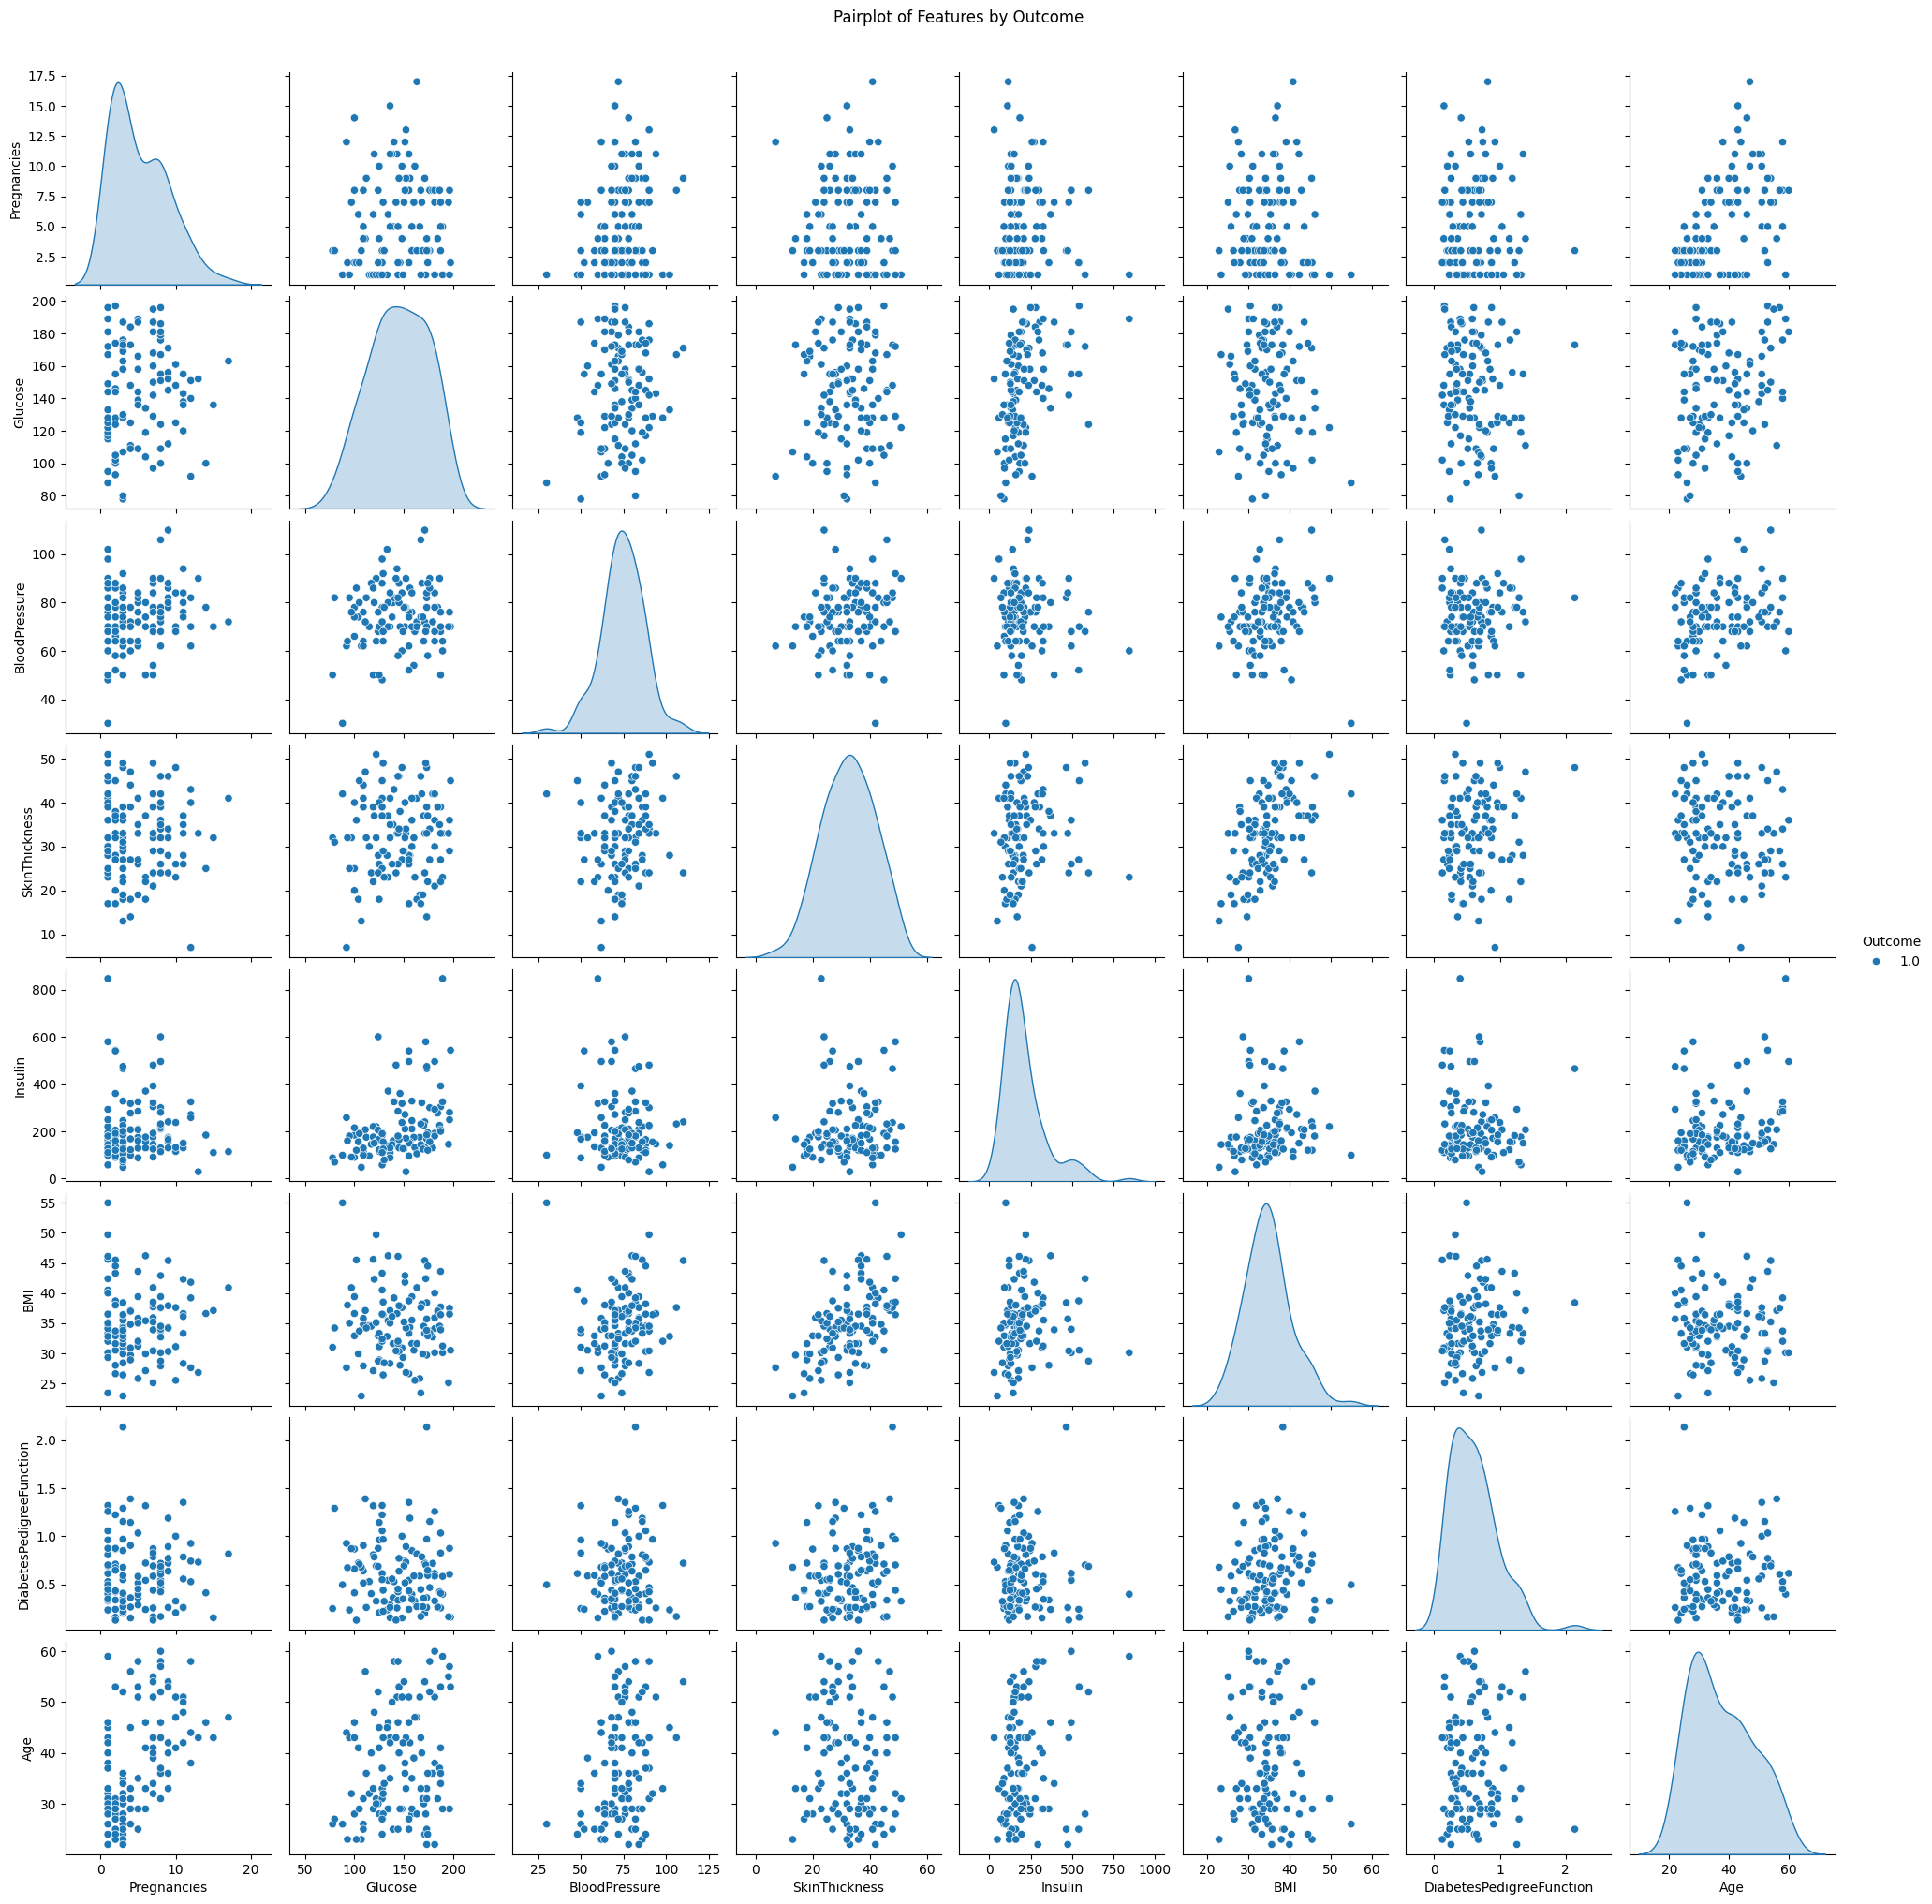

In [13]:
# Pairplot to visualize relationships between features and outcome
# This can take a while to run
print("\n--- Generating Pairplot (this might take a moment) ---")
sns.pairplot(df.replace(0, np.nan).dropna(), hue='Outcome', diag_kind='kde') # Use original df with NaNs and drop them for visualization, or use X_imputed_df
plt.suptitle('Pairplot of Features by Outcome', y=1.02)
plt.show()


--- Generating Histograms of Features ---


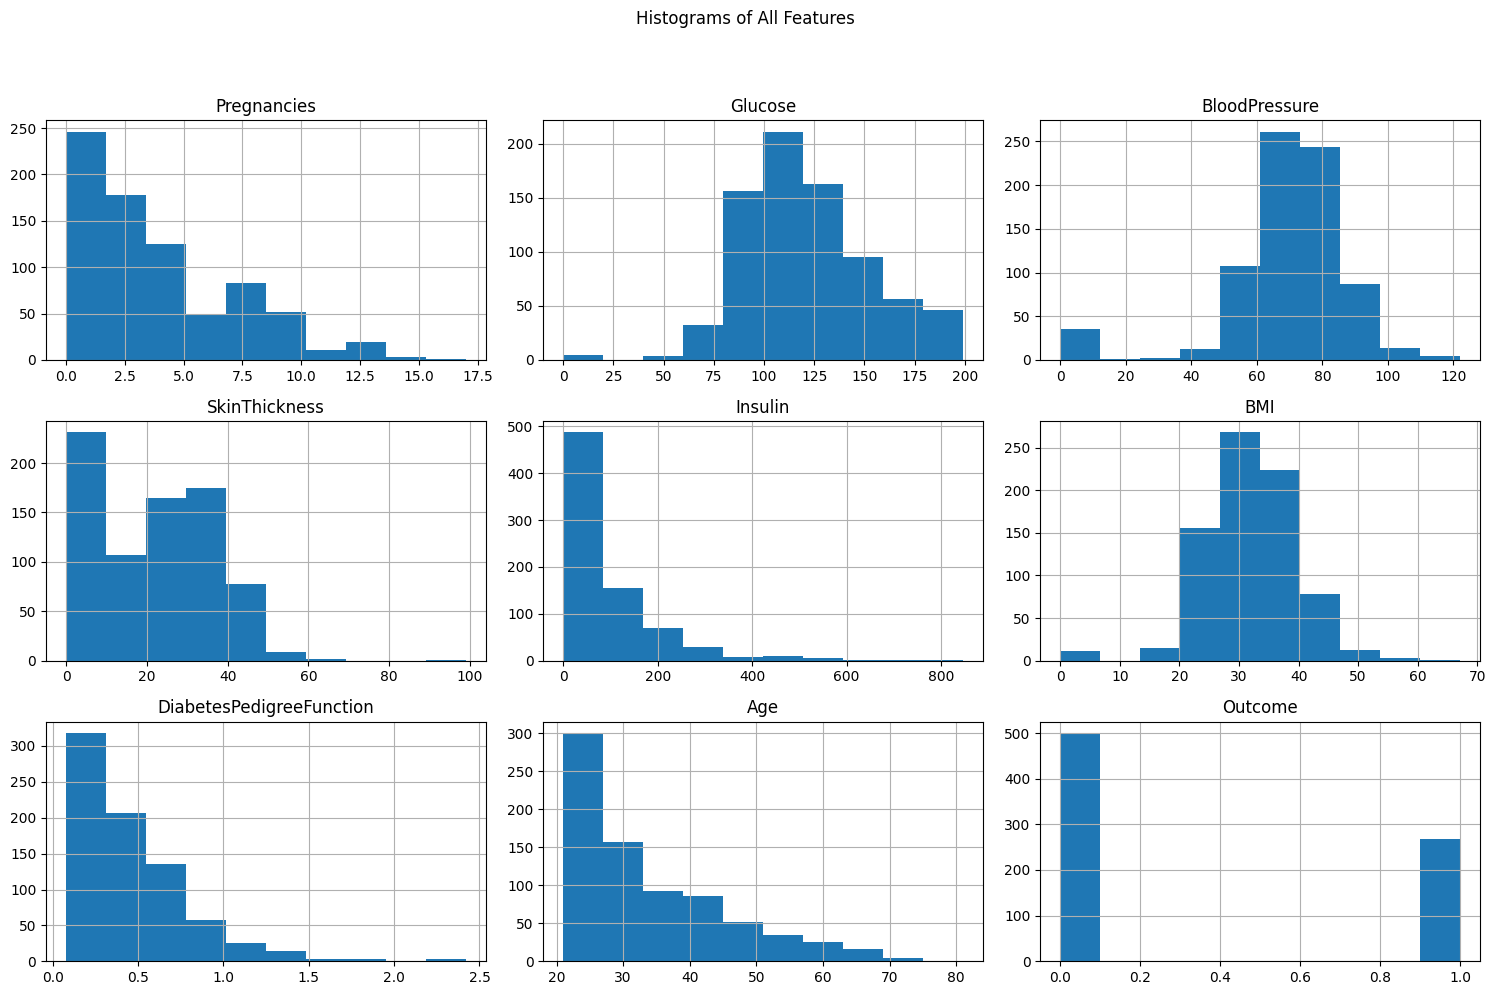

In [14]:
# Histograms of features
print("\n--- Generating Histograms of Features ---")
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of All Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


--- Generating Correlation Heatmap ---


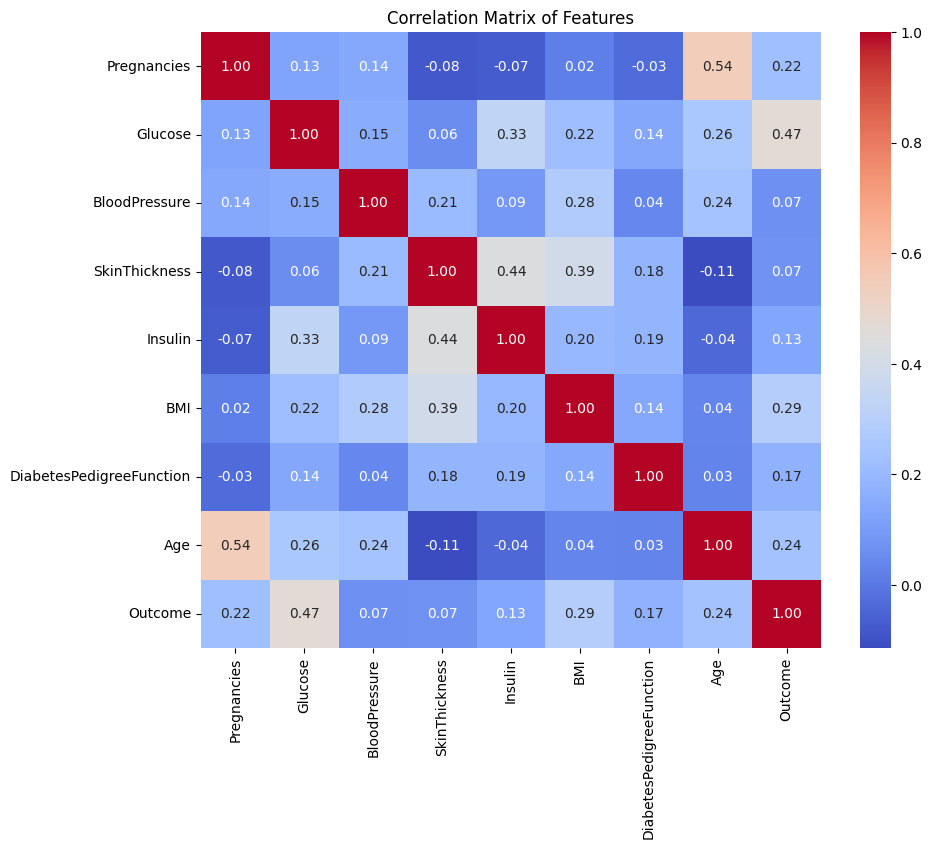

In [15]:
# Correlation Heatmap
print("\n--- Generating Correlation Heatmap ---")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


--- Generating Box Plots by Outcome ---


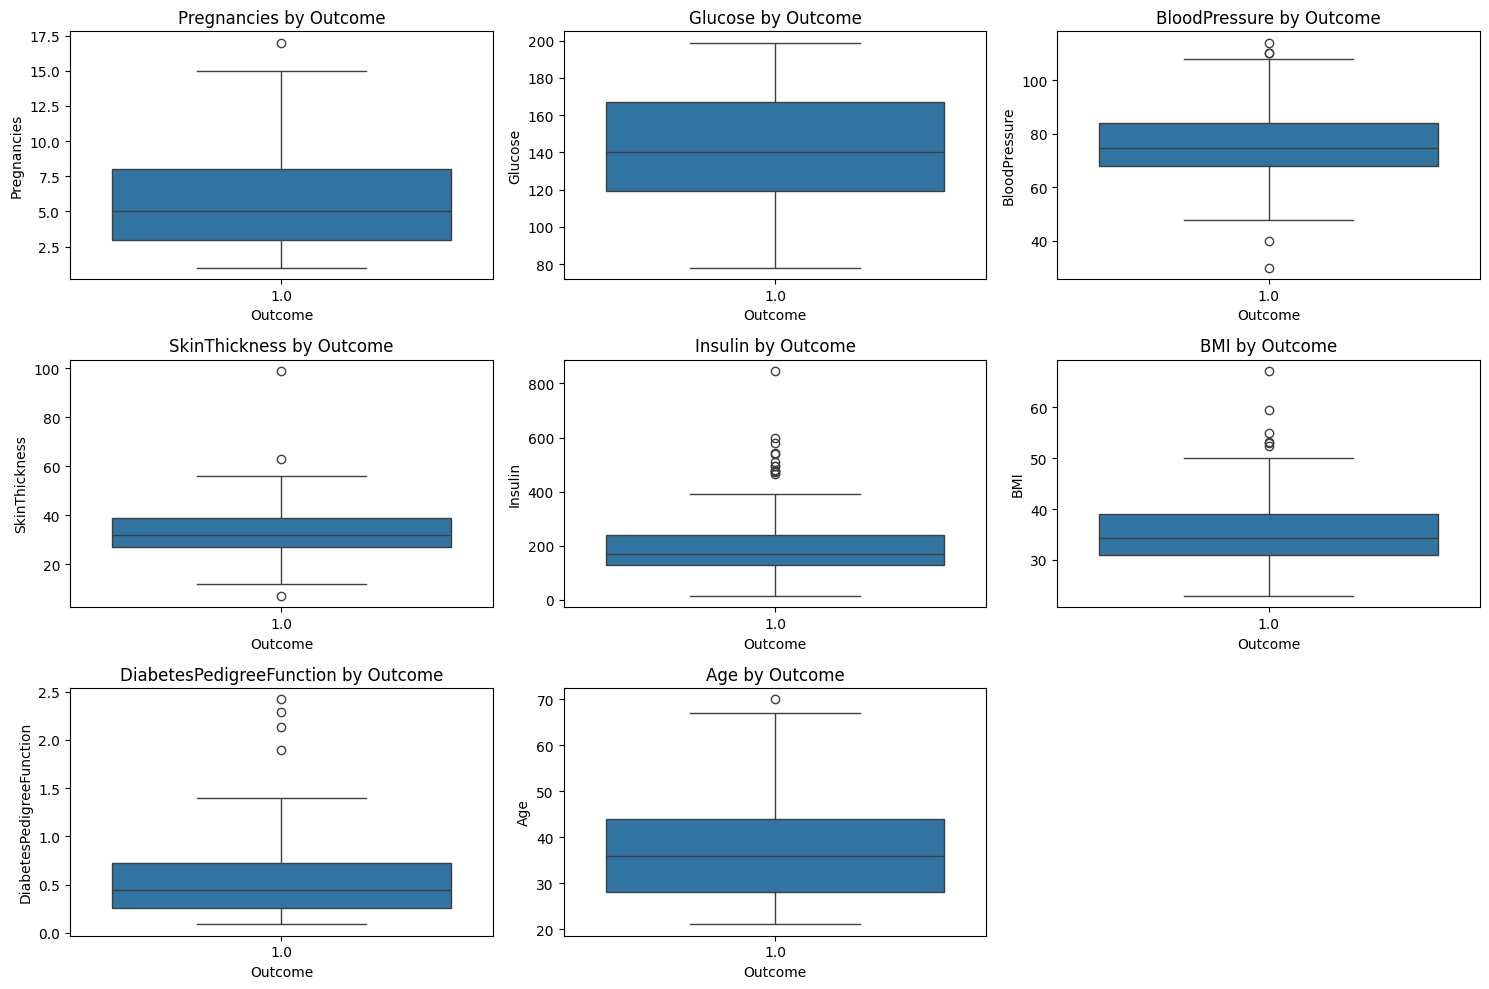

In [16]:
# Box plots to check for outliers and distribution differences by outcome
print("\n--- Generating Box Plots by Outcome ---")
plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df.replace(0, np.nan)) # Use df with NaNs to show real distributions
    plt.title(f'{col} by Outcome')
plt.tight_layout()
plt.show()

### Interpretations from Visualizations:
* **Pairplot**: Provides a scatter matrix showing relationships between pairs of features and their distributions. The `hue='Outcome'` helps visualize how these distributions differ for diabetic vs. non-diabetic individuals. It can highlight potential linear or non-linear relationships and separation between classes.
* **Histograms**: Show the distribution of each feature. We can observe the skewness and spread of each variable. For instance, `Age`, `Pregnancies`, `Insulin`, `SkinThickness`, and `DiabetesPedigreeFunction` appear to be right-skewed.
* **Correlation Heatmap**: Displays the correlation coefficients between all pairs of variables.
    * `Glucose` and `BMI` show a relatively higher positive correlation with `Outcome`.
    * `Age` also shows a positive correlation with `Outcome`.
    * `Pregnancies` has a moderate positive correlation with `Outcome`.
    * High correlations among features (e.g., `SkinThickness` and `BMI` to some extent) might indicate multicollinearity, though for simple classification models, this is often handled by the model itself or ignored unless it significantly impacts interpretability.
* **Box Plots**: Visualize the distribution of each feature for each `Outcome` class (0 and 1).
    * We can clearly see that diabetic individuals (Outcome=1) tend to have higher `Glucose`, `BMI`, `Age`, and `Pregnancies` values on average compared to non-diabetic individuals (Outcome=0).
    * Outliers are also visible, which are common in medical datasets. The median imputation helps handle some of the '0' values, but true outliers might still exist.

This comprehensive exploration and preprocessing notebook covers the requirements for your submission, providing insights into the dataset and demonstrating the necessary data preparation steps.